<a href="https://colab.research.google.com/github/Souzadfs/Data_Science/blob/main/Analista_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`1 - CONFIGURAÇÃO INICIAL`**

In [32]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [16]:
df = pd.read_csv('Credit.csv')


***Visualização da base importada***

In [17]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [18]:
df.tail()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
995,'no checking',12,'existing paid',furniture/equipment,1736,<100,4<=X<7,3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,<0,30,'existing paid','used car',3857,<100,1<=X<4,4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,'existing paid',radio/tv,1845,<100,1<=X<4,4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad
999,0<=X<200,45,'critical/other existing credit','used car',4576,100<=X<500,unemployed,3,'male single',none,...,car,27,none,own,1,skilled,1,none,yes,good


# **`2 - EXPLORAÇÃO E LIMPEZA INICIAL`**

In [19]:
df.shape

(1000, 21)

***Periodo da análise***

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [21]:
df.dtypes

,0
checking_status,object
duration,int64
credit_history,object
purpose,object
credit_amount,int64
savings_status,object
employment,object
installment_commitment,int64
personal_status,object
other_parties,object


In [22]:
df.isnull().sum()

,0
checking_status,0
duration,0
credit_history,0
purpose,0
credit_amount,0
savings_status,0
employment,0
installment_commitment,0
personal_status,0
other_parties,0


In [23]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [24]:
categorical = ['checking_status','credit_history','purpose']
for col in categorical:
  print(col)
  print(df[col].value_counts())
  print()

checking_status
checking_status
'no checking'    394
<0               274
0<=X<200         269
>=200             63
Name: count, dtype: int64

credit_history
credit_history
'existing paid'                     530
'critical/other existing credit'    293
'delayed previously'                 88
'all paid'                           49
'no credits/all paid'                40
Name: count, dtype: int64

purpose
purpose
radio/tv                280
'new car'               234
furniture/equipment     181
'used car'              103
business                 97
education                50
repairs                  22
'domestic appliance'     12
other                    12
retraining                9
Name: count, dtype: int64



# `**3 - ANALISE EXPLORATORIA DOS DADOS (EDA)**`

***# Configurar estilo do Seaborn***

In [25]:
sns.set(style='darkgrid')



***# Distribuição de purpose***

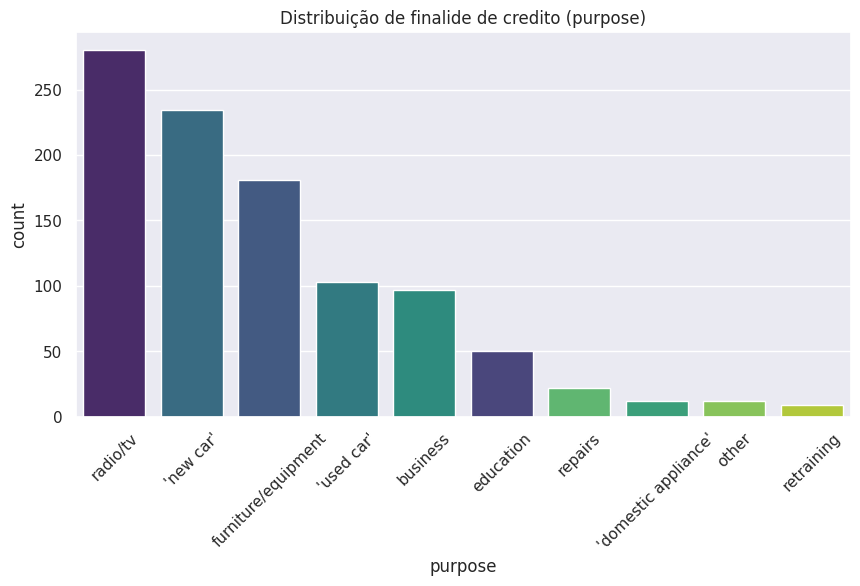

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(
    data=df,
    x='purpose',
    hue='purpose',
    order=df['purpose'].value_counts().index,
    palette="viridis",
    legend=False
)
plt.title('Distribuição de finalide de credito (purpose)')
plt.xticks(rotation=45)
plt.show()

**# Relação entre `credit_amount` e `class`**

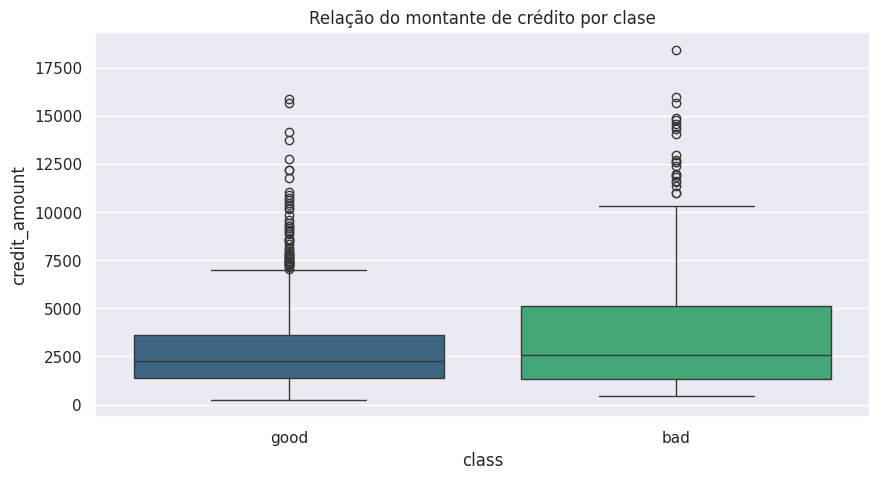

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(
    data=df, x='class',
    y='credit_amount',
    hue='class',
    palette='viridis',
    legend=False
    )
plt.title('Relação do montante de crédito por clase')
plt.show()

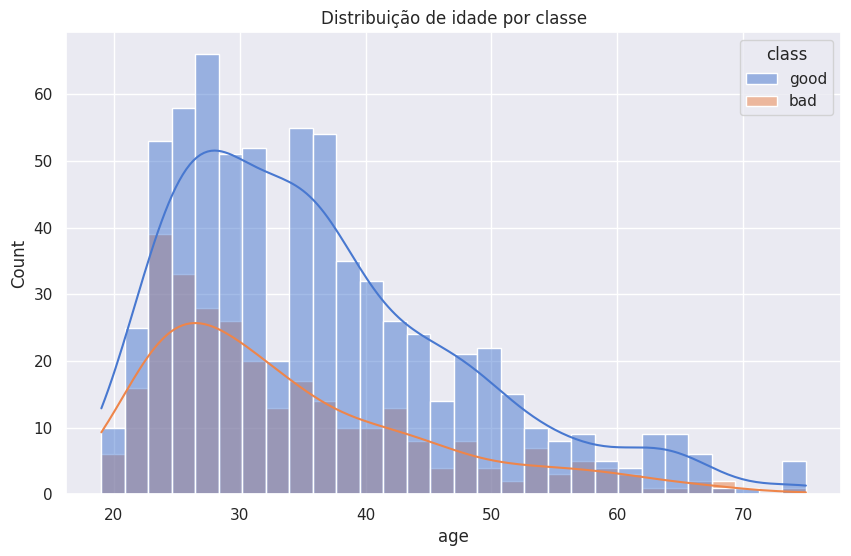

In [39]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,
             x='age',
             hue='class',
             kde=True,
             palette='muted',
             bins=30)
plt.title('Distribuição de idade por classe')
plt.show()

# **` 4 - PRÉ PROCESSAMENTO DOS DADOS`**

***# Codificar variáveis categóricas com OneHotEncoder***

In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [44]:
categorical_cols = ['checking_status', 'credit_history', 'purpose', 'savings_status',
                    'employment', 'personal_status', 'other_parties',
                    'property_magnitude', 'housing', 'job', 'own_telephone', 'foreign_worker']


In [45]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough')

df_encoded = preprocessor.fit_transform(df)

In [46]:
print("Formato após OneHotEncoding:", df_encoded.shape)

Formato após OneHotEncoding: (1000, 60)


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X = df.drop('class', axis=1)
y = df['class']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Conjunto de treinamento: {X_train.shape}")
print(f"Conjunto de teste: {X_test.shape}")

Conjunto de treinamento: (700, 20)
Conjunto de teste: (300, 20)
